# Run 2.1i BF Kernels

In [1]:
import os
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import glob
import sys

In [2]:
14541924 - 15746000

-1204076

In [3]:
kernels_2 = '/global/cscratch1/sd/descdm/tomTest/bfKernels.2/'

In [4]:
rafts = ['R01','R02','R03','R10','R11','R12','R13','R14','R20','R21','R22','R23','R24','R30','R31','R32','R33','R34','R41','R42','R43']

In [5]:
path = '/global/cscratch1/sd/elp25/bf_run21i_tests/bf_kernels/'

In [58]:
def load_kernels(path):
    files = glob.glob(path+'*.pkl')
    kernel_dic = {}
    for raft in rafts:
        kernel_dic[raft] = {}
    for raft in rafts: 
        sensor_files = glob.glob(path+'*'+raft+'*.pkl')
        for file in sensor_files:
            sensor = file[len(path)+13:len(path)+16]
            kernel_dic[raft][sensor] = pd.read_pickle(glob.glob(path+'*'+raft+'*'+sensor+'*.pkl')[0])
    return kernel_dic

In [59]:
kernel_data = load_kernels(path)

In [60]:
kernel_data2 = load_kernels(kernels_2)

In [61]:
test_kernel = kernel_data['R01']['S00'].kernel[0]

In [62]:
test_kernel2 = kernel_data2['R01']['S00'].kernel['C14']

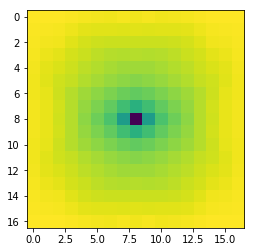

In [63]:
plt.imshow(test_kernel)

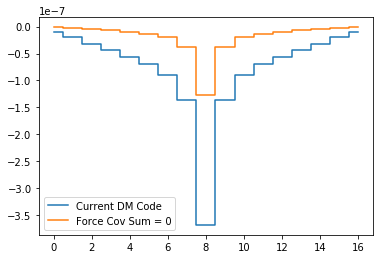

In [64]:
# Note the Force Cov Sum = 0 undercorrects, and the Current DM code overcorrects 

# So seems that the over/under correction is tied to the magnitude of the kernel

plt.plot(test_kernel[:,8], drawstyle='steps-mid',label='Current DM Code')
plt.plot(test_kernel2[:,8], drawstyle='steps-mid',label='Force Cov Sum = 0')
plt.legend(loc='best')

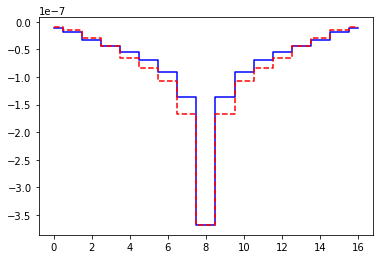

In [65]:
plt.plot(test_kernel[:,8], color='blue', drawstyle='steps-mid')
plt.plot(test_kernel[8,:], linestyle='--', color='red', drawstyle='steps-mid')

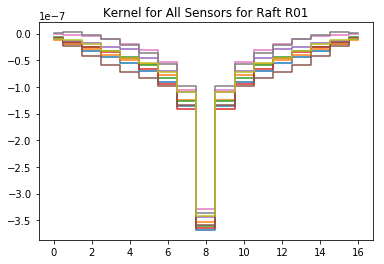

In [66]:
sensors = ['S00', 'S10', 'S20', 'S02', 'S22', 'S21', 'S12', 'S01', 'S11']
R01_kernels = []
for i in range(9):
    R01_kernels.append(kernel_data['R01'][sensors[i]].kernel)


kernels = []
for sensor in R01_kernels:
    for i in range(9):
        try: 
            kernel = sensor[i]
            kernels.append(kernel)
        except:
            pass

for kernel in kernels:
    plt.plot(kernel[:,8],drawstyle='steps-mid')
    plt.title('Kernel for All Sensors for Raft R01')

mean -3.505547589251101e-07
std 1.2863991571935323e-08


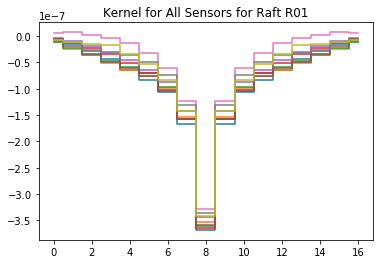

mean -3.4585357192696726e-07
std 1.950021958423767e-08


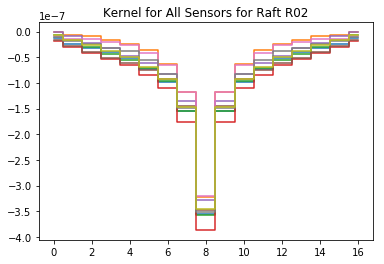

mean -3.487946412339339e-07
std 1.2813628493445415e-08


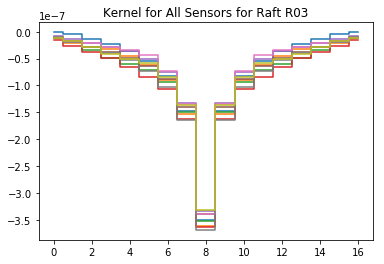

mean -3.508560254096634e-07
std 2.850339196557406e-08


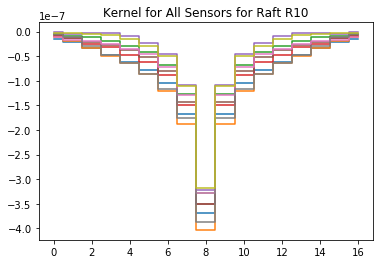

mean -3.4551313176772187e-07
std 2.4507886818700896e-08


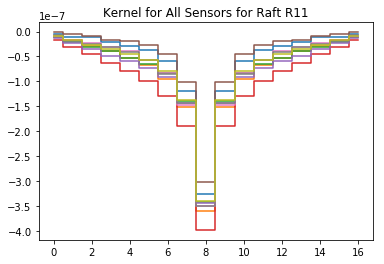

mean -3.41270685490941e-07
std 1.2698928035729104e-08


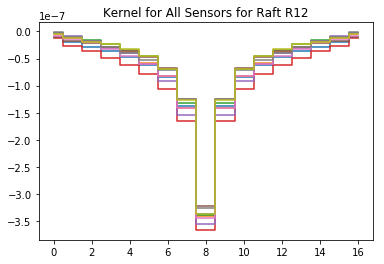

mean -3.469543041227559e-07
std 2.4832482037949285e-08


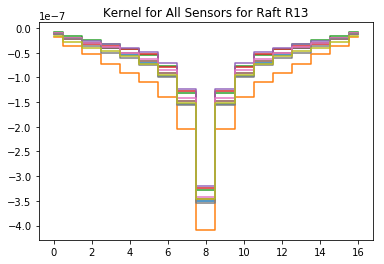

mean -3.36241821805429e-07
std 2.840668376398624e-08


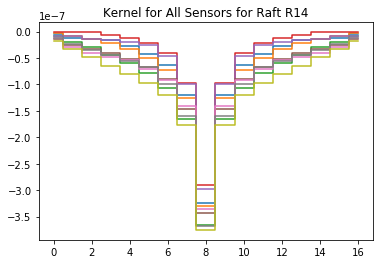

mean -3.492055324612124e-07
std 1.94153555960896e-08


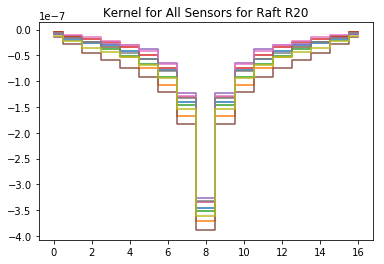

mean -3.651966202337763e-07
std 2.3414411225158334e-08


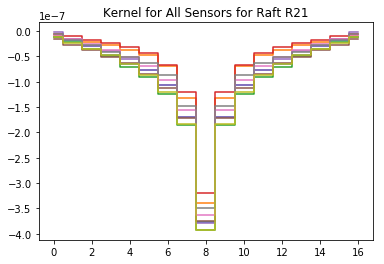

mean -3.3864594369091173e-07
std 3.353136146801101e-08


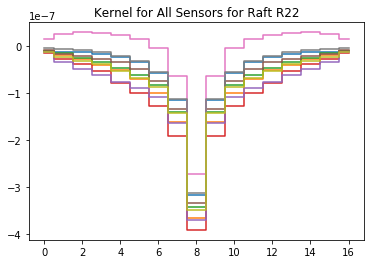

mean -3.6054428006811996e-07
std 1.014722966241594e-08


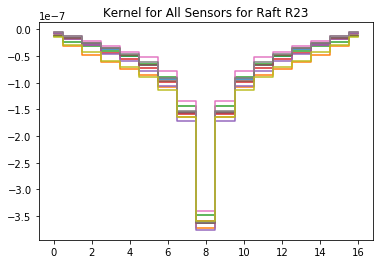

mean -3.401500107215376e-07
std 1.3730933960320184e-08


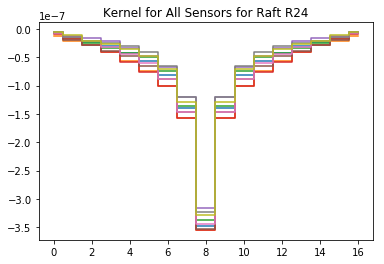

mean -3.277135571063594e-07
std 1.9300728044116458e-08


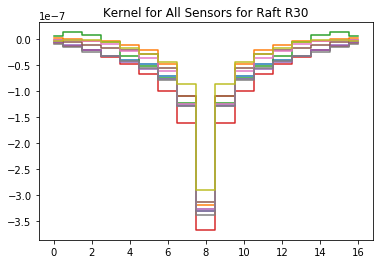

mean -3.3683647239087606e-07
std 3.872161542985482e-08


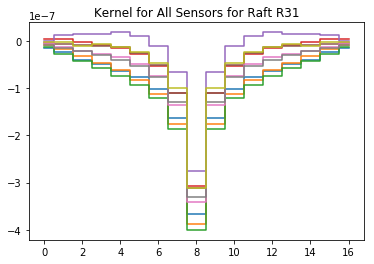

mean -3.590584815817369e-07
std 1.9046389767714137e-08


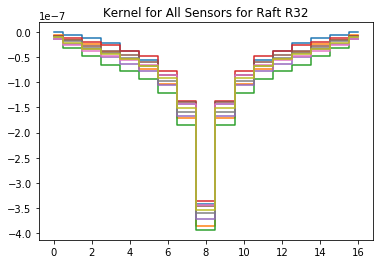

mean -3.4766728576398776e-07
std 3.4774993024175134e-08


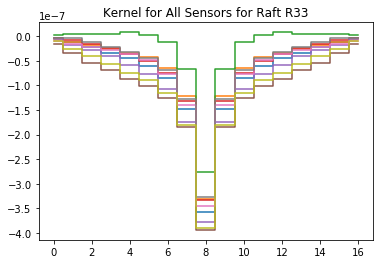

mean -3.521302523408698e-07
std 2.6343819260544733e-08


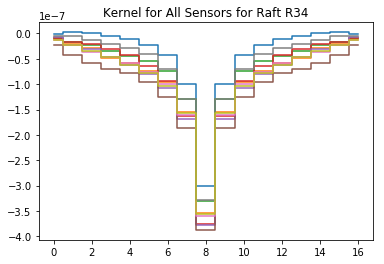

mean -3.6172639623169316e-07
std 2.6626878489254223e-08


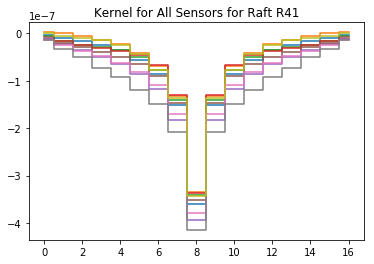

mean -3.6113462820009826e-07
std 2.656253525469655e-08


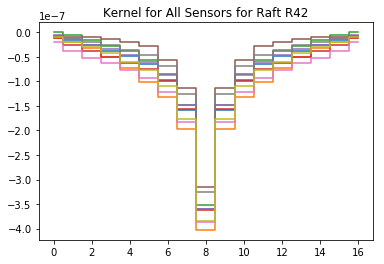

mean -3.432956472046941e-07
std 2.5900006390364245e-08


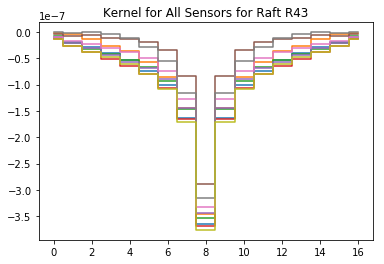

In [74]:
rafts = ['R01','R02','R03','R10','R11','R12','R13','R14','R20','R21','R22','R23','R24','R30','R31','R32','R33','R34','R41','R42','R43']
for raft in rafts:
    raft_kernels = []
    for i in range(9):
        raft_kernels.append(kernel_data[raft][sensors[i]].kernel)
    kernels = []
    for sensor in raft_kernels:
        for i in range(189):
            try: 
                kernel = sensor[i]
                kernels.append(kernel) 
            except:
                pass
    mags_center_pixel_sensor = []
    for kernel in kernels:
        mags_center_pixel_sensor.append(kernel[:,8][8])
        plt.plot(kernel[8,:],drawstyle='steps-mid')
        plt.title('Kernel for All Sensors for Raft '+raft)
    print('mean',np.mean(mags_center_pixel_sensor))
    print('std',np.std(mags_center_pixel_sensor))
    plt.show()

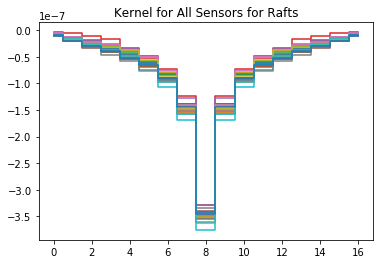

In [68]:
rafts = ['R01','R02','R03','R10','R11','R12','R13','R14','R20','R21','R22','R23','R24','R30','R31','R32','R33','R34','R41','R42','R43']
mags_center_pixel = []
for raft in rafts:
    raft_kernels = []
    for i in range(9):
        raft_kernels.append(kernel_data[raft][sensors[i]].kernel)
    kernels = []
    for sensor in raft_kernels:
        for i in range(189):
            try: 
                kernel = sensor[i]
                kernels.append(kernel)
                mags_center_pixel.append(kernel[:,8][8])
            except:
                pass

    raft_kernel = np.median(np.array(kernels),axis=0)
    plt.plot(raft_kernel[8,:],drawstyle='steps-mid',label=raft)
plt.title('Kernel for All Sensors for Rafts')
plt.show()

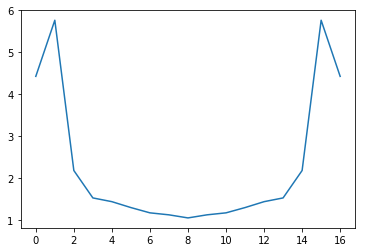

In [69]:
plt.plot(kernels[0][8,:]/kernels[1][8,:])
plt.show()

### Spread of Kernel

What is the spread of the center pixel value across all sensors?

In [70]:
mags_center_pixel = np.array(mags_center_pixel)

Mean -3.4806400231801886e-07
Std 2.5953457850341274e-08


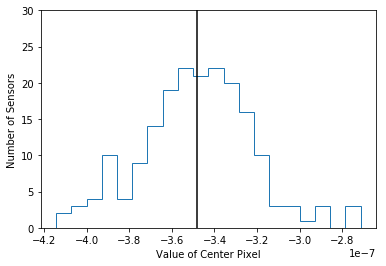

In [71]:
plt.hist(mags_center_pixel,histtype='step',bins=20)
plt.xlabel('Value of Center Pixel')
plt.ylabel('Number of Sensors')
plt.vlines(np.mean(mags_center_pixel),ymin=0,ymax=30)
plt.ylim(0,30)
print('Mean',np.mean(mags_center_pixel))
print('Std',np.std(mags_center_pixel))

What is the spread of the kernel across a single raft?